In [1]:
import pandas as pd
import numpy as np

df=pd.DataFrame({"Names":["Jack","Roman","Steph",np.nan,np.nan],"Profession":[np.nan,"Engineering",np.nan,"IT",np.nan],"Other":[np.nan,np.nan,np.nan,np.nan,np.nan],"otherNames":["Jack","Roman","Steph","a","b"]})
df

,Names,Profession,Other,otherNames
0,Jack,NaN,NaN,Jack
1,Roman,Engineering,NaN,Roman
2,Steph,NaN,NaN,Steph
3,NaN,IT,NaN,a
4,NaN,NaN,NaN,b


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Names       3 non-null      object 
 1   Profession  2 non-null      object 
 2   Other       0 non-null      float64
 3   otherNames  5 non-null      object 
dtypes: float64(1), object(3)
memory usage: 288.0+ bytes


In [3]:
# finding if values are null/ not null in complete data set
df.isnull()

,Names,Profession,Other,otherNames
0,False,True,True,False
1,False,False,True,False
2,False,True,True,False
3,True,False,True,False
4,True,True,True,False


In [4]:
# finding total null values for each column
df.isnull().sum()

Names         2
Profession    3
Other         5
otherNames    0
dtype: int64

In [5]:
(df.isnull().sum()/len(df))  *100

Names          40.0
Profession     60.0
Other         100.0
otherNames      0.0
dtype: float64

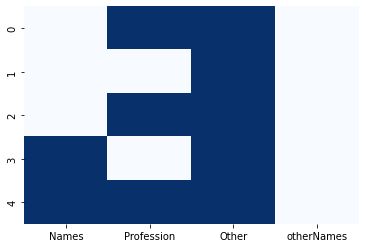

In [8]:
import seaborn as sns

sns.heatmap(df.isnull(), cbar=False, cmap="Blues")

In [ ]:
#finding total null values in complete dataset
df.isnull().sum().sum()

10

In [ ]:
#finding total null values in complete dataset
df.isna().sum().sum()

10

In [ ]:
# finding total null values in column "Profession"
df["Profession"].isna().sum()

3

In [ ]:
df

,Names,Profession,Other,otherNames
0,Jack,NaN,NaN,Jack
1,Roman,Engineering,NaN,Roman
2,Steph,NaN,NaN,Steph
3,NaN,IT,NaN,a
4,NaN,NaN,NaN,b


In [ ]:
# finding total null values for a specific row

df.loc[[4]].isna().sum().sum()

3

In [ ]:
df.loc[4].isna().sum()

3

In [ ]:
df.loc[[3]].isna().sum().sum()

2

In [ ]:
#drop columns having all values as NaN

df.dropna(axis=1, how="all")

,Names,Profession,otherNames
0,Jack,NaN,Jack
1,Roman,Engineering,Roman
2,Steph,NaN,Steph
3,NaN,IT,a
4,NaN,NaN,b


In [10]:
df

,Names,Profession,Other,otherNames
0,Jack,NaN,NaN,Jack
1,Roman,Engineering,NaN,Roman
2,Steph,NaN,NaN,Steph
3,NaN,IT,NaN,a
4,NaN,NaN,NaN,b


In [9]:
df.dropna(subset=["Names", "Profession"], axis=0)

,Names,Profession,Other,otherNames
1,Roman,Engineering,NaN,Roman


In [ ]:
#filling null values with some replacement

replacement= {'Names': 0, 'Profession': 'unknown', 'Other': -99999}

df.fillna(value=replacement)

,Names,Profession,Other,otherNames
0,Jack,unknown,-99999.0,Jack
1,Roman,Engineering,-99999.0,Roman
2,Steph,unknown,-99999.0,Steph
3,0,IT,-99999.0,a
4,0,unknown,-99999.0,b


In [ ]:
#by default unique includes NaN values also 
df["Names"].unique()

array(['Jack', 'Roman', 'Steph', nan], dtype=object)

In [ ]:
# by default nunique doesnt include NaN values so it will show count of non null values

print(df["Names"].nunique())

# so if you want to include count of null values also, use dropna=False in nunique

print(df["Names"].nunique(dropna=False))

3
4


In [ ]:
#using replace to fill NaN values

# can also use mean,median,mode to replace NaN values, just put value=df["col_name"].mean(axis=1)

df["Profession"].replace(to_replace=np.nan, value="Unknown", inplace=True)
df

,Names,Profession,Other,otherNames
0,Jack,Unknown,NaN,Jack
1,Roman,Engineering,NaN,Roman
2,Steph,Unknown,NaN,Steph
3,NaN,IT,NaN,a
4,NaN,Unknown,NaN,b


In [ ]:
df=pd.DataFrame({"Names":["Jack","Roman","Steph",np.nan,np.nan],"Profession":[np.nan,"Engineering",np.nan,"IT",np.nan],"Other":[np.nan,np.nan,np.nan,np.nan,np.nan],"otherNames":["Jack","Roman","Steph","a","b"]})
df

,Names,Profession,Other,otherNames
0,Jack,NaN,NaN,Jack
1,Roman,Engineering,NaN,Roman
2,Steph,NaN,NaN,Steph
3,NaN,IT,NaN,a
4,NaN,NaN,NaN,b


In [ ]:
# filling NaN values using backwardfill--> replacing NaN value with next valid row value but if last value is itself null it will remain unchanged
# as there is no next value present

#filling from backward

df.fillna(method="bfill")

,Names,Profession,Other,otherNames
0,Jack,Engineering,NaN,Jack
1,Roman,Engineering,NaN,Roman
2,Steph,IT,NaN,Steph
3,NaN,IT,NaN,a
4,NaN,NaN,NaN,b


In [ ]:
df=pd.DataFrame({"Names":["Jack","Roman","Steph",np.nan,np.nan],"Profession":[np.nan,"Engineering",np.nan,"IT",np.nan],"Other":[np.nan,np.nan,np.nan,np.nan,np.nan],"otherNames":["Jack","Roman","Steph","a","b"]})
df

,Names,Profession,Other,otherNames
0,Jack,NaN,NaN,Jack
1,Roman,Engineering,NaN,Roman
2,Steph,NaN,NaN,Steph
3,NaN,IT,NaN,a
4,NaN,NaN,NaN,b


In [ ]:
# filling NaN values using forwardfill--> replacing NaN value with previous valid row value but if first value is itself null it will remain unchanged
# as there is no previous present

#filling from forward

df.fillna(method="ffill")

,Names,Profession,Other,otherNames
0,Jack,NaN,NaN,Jack
1,Roman,Engineering,NaN,Roman
2,Steph,Engineering,NaN,Steph
3,Steph,IT,NaN,a
4,Steph,IT,NaN,b
